# Codebasics - Bag of N grams tutorial

Let's first understand how to generate n-grams using CountVectorizer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

v= CountVectorizer()

v.fit(["Faisal Vai is one the best employee in NSL."])
v.vocabulary_


{'faysal': 2,
 'vai': 8,
 'is': 4,
 'one': 6,
 'the': 7,
 'best': 0,
 'employee': 1,
 'in': 3,
 'nsl': 5}

In [18]:
#bi-gram  and tri-gram
v= CountVectorizer(ngram_range=(1,2))
v.fit(["Faisal Vai is one the best employee in NSL."])
v.vocabulary_

{'faisal': 4,
 'vai': 15,
 'is': 8,
 'one': 11,
 'the': 13,
 'best': 0,
 'employee': 2,
 'in': 6,
 'nsl': 10,
 'faisal vai': 5,
 'vai is': 16,
 'is one': 9,
 'one the': 12,
 'the best': 14,
 'best employee': 1,
 'employee in': 3,
 'in nsl': 7}

In [19]:
v

CountVectorizer(ngram_range=(1, 2))

In [20]:
v.get_stop_words

<bound method _VectorizerMixin.get_stop_words of CountVectorizer(ngram_range=(1, 2))>

In [21]:
v.build_tokenizer

<bound method _VectorizerMixin.build_tokenizer of CountVectorizer(ngram_range=(1, 2))>

In [22]:
v.vocabulary_

{'faisal': 4,
 'vai': 15,
 'is': 8,
 'one': 11,
 'the': 13,
 'best': 0,
 'employee': 2,
 'in': 6,
 'nsl': 10,
 'faisal vai': 5,
 'vai is': 16,
 'is one': 9,
 'one the': 12,
 'the best': 14,
 'best employee': 1,
 'employee in': 3,
 'in nsl': 7}

In [23]:
v.binary

False

In [24]:
v.encoding

'utf-8'


We will not take a simple collection of text documents, preprocess them to remove stop words, lemmatize etc and then generate bag of 1 grams and 2 grams from it

In [11]:
corpus = [
    "NSL ate pizza",
    "NSL is tall",
    "Meo is eating fish"
]

In [12]:
type(corpus)

list

In [13]:
import spacy
# load english language model and create nlp object from it 
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    #rmeove stop words and lemmatize the text
    doc = nlp(text)
    filtered_token = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    return " ".join(filtered_token)


In [16]:
text='NSL is on the growing company in Bangladesh'
preprocess(text)

'NSL grow company Bangladesh'

In [17]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['NSL eat pizza', 'NSL tall', 'Meo eat fish']

In [25]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'nsl': 6,
 'eat': 0,
 'pizza': 9,
 'nsl eat': 7,
 'eat pizza': 2,
 'tall': 10,
 'nsl tall': 8,
 'meo': 4,
 'fish': 3,
 'meo eat': 5,
 'eat fish': 1}

In [27]:
# Now generate bag of n gram vector for few sample documents
v.transform(["Badhon eat pizza"]).toarray()



array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]])

# News Category Classification Problem


Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

- BUSINESS
- SPORTS
- CRIME
- SCIENCE

Dataset
Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

This data consists of two columns. - Text - Category

Text is a news article

Category can be one of these 4: 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE',

to keep things simple I trimmed additional categories from the original dataset

In [28]:
import pandas as pd
df = pd.read_json('news_dataset.json')
print(df.shape)

(12695, 2)


In [29]:
df

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME
...,...,...
12690,Coach Shakes Hands Of Imaginary Players After ...,SPORTS
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE
12692,RECAP: Dramatic Eclipse Photos Don't miss the ...,SCIENCE
12693,Richard Sherman Wants To Talk About Police Sho...,SPORTS


In [30]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

Handle class imbalance

As you can see above, SCIENCE category has almost 1/3rd data samples compared to BUSINESS and SPORTS categories. I initially trained a model without handling the imbalanced I saw a lower f1-score for SCIENCE category. Hence we need to address this imbalanced.

There are various ways of handling class imbalance which I have discussed in this video: https://www.youtube.com/watch?v=JnlM4yLFNuo

Out of those techniques, I will use undersampling technique here.

In undersampling, we take a minor class and sample those many samples from other classes, this means we are not utilizing all the data samples for training and in ML world - Not using all the data for training is considered a SIN! 😵 In real life, you are advised to use a technique such as SMOTE so that you can utilize all of your dataset for the training but since this tutorial is more about bag of n-grams then class imbalance itself, I'd go with a simple technique of undersampling.



In [33]:
min_samples = 1381

df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=102)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=102)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=102)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=102)



In [37]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()
# df_balanced.head(5)

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [40]:
target = {'BUSINESS':0,'SPORTS':1,'CRIME':2,'SCIENCE':3}
df_balanced['category_num'] = df_balanced['category'].map(target)

In [41]:
df_balanced

,text,category,category_num
511,Jimmy John's To Get Rid Of Controversial Nonco...,BUSINESS,0
2511,The One Trait Successful Managers Have In Comm...,BUSINESS,0
757,This Labor Day - Make Safety a Priority in You...,BUSINESS,0
11951,Minorities Exploited By Warren Buffett’s Mobil...,BUSINESS,0
1634,How Brexit Fits Into The New World Order What ...,BUSINESS,0
...,...,...,...
5708,Women in Paleontology: A Celebration of Female...,SCIENCE,3
2205,Meteor Showers On Demand Could Be Coming Soon ...,SCIENCE,3
5456,"'Arrogant' King's 2,100-Year-Old Mausoleum Dis...",SCIENCE,3
6931,"Whales Are Mysteriously Dying In Alaska ""We do...",SCIENCE,3


In [42]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=102,
    stratify=df_balanced.category_num
)

In [44]:
print(X_train.shape)
X_train.head(5)

(4419,)


2090    Charles Manson Gets A New Mug Shot The wrinkle...
9180    Scientists Discover Bizarre World With Three S...
642     Employees in Creative Roles Deserve Strong Man...
5518    Muhammad Ali's Son Detained At Airport, Asked ...
1454    Man Who Supplied Guns To California Shooters A...
Name: text, dtype: object

In [45]:
y_test.value_counts()


category_num
0    277
3    276
1    276
2    276
Name: count, dtype: int64

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB',MultinomialNB())

])

clf.fit(X_train, y_train)




Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
                ('Multi NB', MultinomialNB())])

In [63]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81       277
           1       0.93      0.84      0.88       276
           2       0.86      0.88      0.87       276
           3       0.95      0.77      0.85       276

    accuracy                           0.85      1105
   macro avg       0.87      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



In [54]:
X_test[:5]

2346     Uber Drivers In New York Form Labor Associatio...
7246     This Astronaut's Bagpipes Performance Is Out O...
2989     Sports Illustrated's New Rio Olympics Cover Na...
10795    Next Time Greg Hardy Abuses Women, He's Out Of...
4595       New Study Of Killer Chimps Sparks Major Debate 
Name: text, dtype: object

In [55]:
y_test[:5]

2346     0
7246     3
2989     1
10795    1
4595     3
Name: category_num, dtype: int64

In [56]:
y_pred[:5]

array([0, 3, 1, 1, 3])

In [66]:
df_balanced['preprocessed_txt'] = df_balanced.text.apply(preprocess)

In [67]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
511,Jimmy John's To Get Rid Of Controversial Nonco...,BUSINESS,0,Jimmy John rid Controversial Noncompete Agreem...
2511,The One Trait Successful Managers Have In Comm...,BUSINESS,0,Trait Successful Managers Common businessman a...
757,This Labor Day - Make Safety a Priority in You...,BUSINESS,0,Labor Day Safety Priority Workplace Labor Day ...
11951,Minorities Exploited By Warren Buffett’s Mobil...,BUSINESS,0,minority exploit Warren Buffett Mobile Home Em...
1634,How Brexit Fits Into The New World Order What ...,BUSINESS,0,Brexit fit New World Order U.K. vote leave EU ...


In [68]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=102,
    stratify=df_balanced.category_num
)



In [69]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB',MultinomialNB())

])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.72      0.91      0.81       277
           1       0.93      0.84      0.88       276
           2       0.86      0.88      0.87       276
           3       0.95      0.77      0.85       276

    accuracy                           0.85      1105
   macro avg       0.87      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



In [70]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[253,   4,  16,   4],
       [ 23, 232,  15,   6],
       [ 27,   5, 242,   2],
       [ 48,   8,   8, 212]])

Text(95.72222222222221, 0.5, 'Truth')

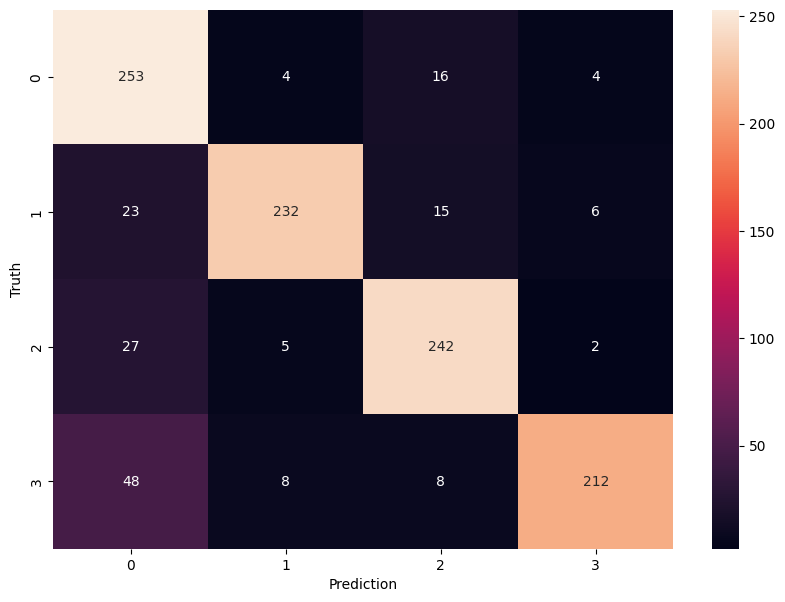

In [74]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [75]:
# !pip install seaborn